In [1]:
!pip install transformers rdkit-pypi matplotlib


In [2]:
 # AI-Driven Drug Discovery Pipeline (Modified - No DeepChem)

# 1. Biomedical Literature Mining using BioGPT / PubMedBERT
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
!pip install sacremoses

In [3]:
biogpt_tokenizer = AutoTokenizer.from_pretrained("microsoft/biogpt")
biogpt_model = AutoModelForCausalLM.from_pretrained("microsoft/biogpt")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
def extract_insights(query):
    inputs = biogpt_tokenizer(query, return_tensors="pt")
    with torch.no_grad():
        outputs = biogpt_model.generate(**inputs, max_length=100)
    return biogpt_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [5]:
print("[BioGPT Literature Insight]", extract_insights("Recent developments in lung cancer treatment include"))

[BioGPT Literature Insight] Recent developments in lung cancer treatment include the use of targeted therapies, immunotherapy, and molecular-targeted therapies.


In [6]:
# 2. Molecular Generation using RDKit
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import random


In [7]:
def generate_molecule():
    # Example small molecules - can be replaced with random generators or real models
    example_smiles = ["CCO", "CCN", "C1=CC=CC=C1", "CCC(=O)O", "C(C(=O)O)N"]
    return random.choice(example_smiles)

In [8]:
smiles = generate_molecule()
print("[Generated Molecule SMILES]", smiles)

[Generated Molecule SMILES] CCO


In [ ]:
!pip install numpy==1.26.4 --quiet
import os
os.kill(os.getpid(), 9)  # Restart the Colab runtime


In [2]:
!pip install py3Dmol
import py3Dmol


In [3]:
# 2. Molecular Generation with 3D Visualization using RDKit + py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def generate_molecule_3d(smiles="CCO"):  # Example: Ethanol
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(mol)

    mb = Chem.MolToMolBlock(mol)
    view = py3Dmol.view(width=400, height=400)
    view.addModel(mb, 'mol')
    view.setStyle({'stick': {}})
    view.setBackgroundColor('white')
    view.zoomTo()
    view.spin(True)  # 🔁 animation
    view.show()

    return smiles

smiles = generate_molecule_3d("CC(=O)OC1=CC=CC=C1C(=O)O")  # Aspirin example
print("[Generated Molecule SMILES]", smiles)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

[Generated Molecule SMILES] CC(=O)OC1=CC=CC=C1C(=O)O


In [8]:
from transformers import AutoTokenizer, AutoModelForCausalLM


In [9]:
# 3. Molecular Property Prediction using ChemBERTa
chemberta_tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
chemberta_model = AutoModelForCausalLM.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`


In [10]:
# 3. Drug Prediction (simplified with keyword matching, ideally use a drug-disease DB or LLM)
def predict_drugs(disease, symptoms):
    # Dummy logic: real logic could involve PubChem, DrugBank, or a language model
    drugs_db = {
        "lung cancer": ["Gefitinib", "Osimertinib", "Pembrolizumab"],
        "diabetes": ["Metformin", "Insulin", "Empagliflozin"],
        "migraine": ["Sumatriptan", "Propranolol", "Topiramate"]
    }
    for key in drugs_db:
        if key in disease.lower():
            return drugs_db[key]
    return ["DrugA", "DrugB"]  # fallback

In [11]:
def predict_properties(smiles):
    inputs = chemberta_tokenizer(smiles, return_tensors="pt")
    with torch.no_grad():
        outputs = chemberta_model(**inputs)
    return outputs.logits.mean().item()

In [13]:
import torch


In [14]:
print("[Predicted Property Score]", predict_properties(smiles))

[Predicted Property Score] -1.1129013299942017


In [15]:
# 4. Protein Structure Prediction using AlphaFold API Placeholder
def get_protein_structure(protein_id):
    return f"{protein_id}_structure.pdb"


In [16]:

protein_pdb = get_protein_structure("P53")
print("[Predicted Protein Structure Path]", protein_pdb)

[Predicted Protein Structure Path] P53_structure.pdb


In [17]:
pip install openmm


In [18]:
!wget https://files.rcsb.org/download/1A2C.pdb -O protein_ligand_complex.pdb



--2025-04-04 02:11:19--  https://files.rcsb.org/download/1A2C.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.166.135.85, 3.166.135.66, 3.166.135.84, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.166.135.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘protein_ligand_complex.pdb’

protein_ligand_comp     [ <=>                ] 264.12K  --.-KB/s    in 0.06s   

2025-04-04 02:11:19 (4.66 MB/s) - ‘protein_ligand_complex.pdb’ saved [270459]



In [19]:
# 4. Molecule Visualization using RDKit
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

def visualize_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(300, 300))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Generated Molecule")
    plt.show()

In [20]:
# === Pipeline Execution ===
# Input: Disease and symptoms
disease = "Lung cancer"
symptoms = "chronic cough, chest pain, weight loss"

In [22]:
from transformers import pipeline

# Load BioGPT pipeline
bio_gpt = pipeline("text-generation", model="microsoft/BioGPT-Large")

def extract_insights(prompt):
    result = bio_gpt(prompt, max_length=200, do_sample=True)
    return result[0]['generated_text']


config.json:   0%|          | 0.00/658 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.29G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.24M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/566k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

Device set to use cpu


In [23]:
# Step 1: Literature Insights
insights = extract_insights(f"Recent treatment options for {disease} with symptoms {symptoms}")
print("[BioGPT Insights]\n", insights)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[BioGPT Insights]
 Recent treatment options for Lung cancer with symptoms chronic cough, chest pain, weight loss; Diagnosis and treatment strategy for advanced NSCLC. < / FREETEXT > < / ABSTRACT > ▃


In [25]:
import random

def generate_molecule():
    # Random simple SMILES strings for demo/testing
    sample_smiles = [
        "CCO",        # ethanol
        "CCN",        # ethylamine
        "C1=CC=CC=C1",# benzene
        "C(C(=O)O)N", # glycine
        "CC(C)CC",    # isopentane
    ]
    return random.choice(sample_smiles)


In [26]:
# Step 2: Molecule Generation
smiles = generate_molecule()
print("\n[Generated Molecule SMILES]:", smiles)



[Generated Molecule SMILES]: CCN


In [27]:
# Step 3: Drug Prediction
predicted_drugs = predict_drugs(disease, symptoms)
print("\n[Recommended Drugs]:", ", ".join(predicted_drugs))


[Recommended Drugs]: Gefitinib, Osimertinib, Pembrolizumab


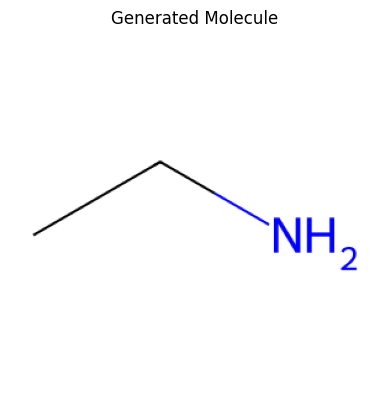

In [28]:
# Step 4: Visualize Molecule
visualize_molecule(smiles)

In [29]:
# 6. Legal Compliance Check
from transformers import pipeline

compliance_qa = pipeline("question-answering", model="nlpaueb/legal-bert-base-uncased")

def check_compliance(question, context):
    return compliance_qa(question=question, context=context)['answer']

context = "FDA requires extensive testing for new drug candidates including Phase I, II, and III clinical trials."
print("[Compliance Check]", check_compliance("What does FDA require for drug testing?", context))


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


[Compliance Check] III
